<a href="https://colab.research.google.com/github/groneperrosato/academic/blob/main/clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En esta libreta se va a realizar el proyecto del módulo de Aprendizaje No Supervisado, en el que vamos a poner en práctica algunos de los conocimientos adquiridos durante el mismo.

Para ello, usaremos el famosos conjunto de datos[ Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).

In [2]:
# import some libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.

import seaborn as sns
sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

# show plots inline

%matplotlib inline

### Get Data

In [3]:
# get data and show some records

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame

data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it

data.sample(5)

,sepal length,sepal width,petal length,petal width,target
56,6.3,3.3,4.7,1.6,Iris-versicolor
88,5.6,3.0,4.1,1.3,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
38,4.4,3.0,1.3,0.2,Iris-setosa


In [4]:
# split data into features (X) and labels (y)

X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Caracteristicas \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
7             5.0          3.4           1.5          0.2
73            6.1          2.8           4.7          1.2
113           5.7          2.5           5.0          2.0
107           7.3          2.9           6.3          1.8
21            5.1          3.7           1.5          0.4

 Target 

120     Iris-virginica
73     Iris-versicolor
21         Iris-setosa
142     Iris-virginica
111     Iris-virginica
Name: target, dtype: object


### Visualize Data

In [5]:
# count features of each class

data["target"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

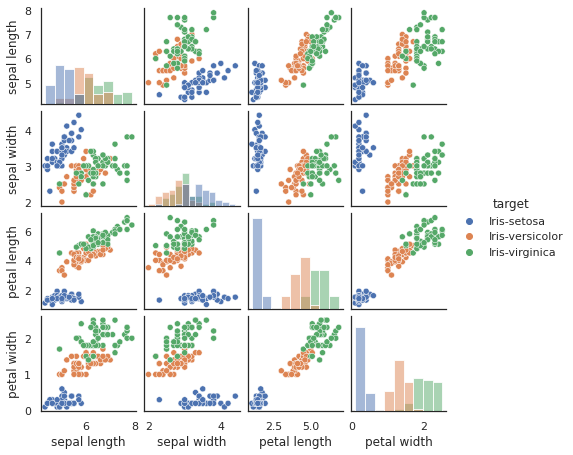

In [6]:
# represent all possible combinations of features

sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

Versicolor y Virginica son muy similares, será muy dificil generar un algoritmo de clustering que las pueda separar, pero vamos a intentarlo!! 

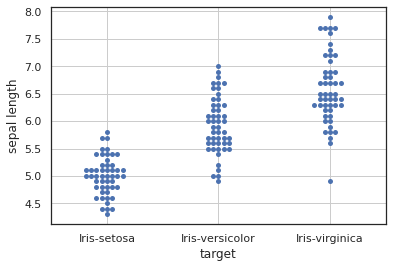

In [7]:
# represent the distribution of the sepal lengh per class

sns.swarmplot(x="target", y="sepal length", data=data)
plt.grid()


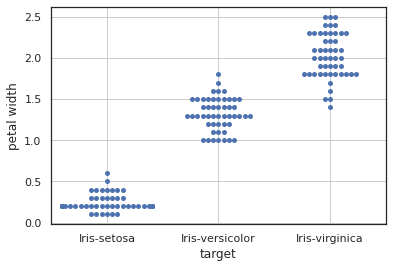

In [8]:
# represent the distribution of the petal width per class

sns.swarmplot(x="target", y="petal width", data=data)
plt.grid()

### Feature Scaling

Los datos estan desbalanceados por ejemplo Sepal Lenght es aproximadamente 4 veces mas grande que Petal Width, 
por lo tando recomiendo escalar los valores.
de lo contrario, las características más grandes dominarán a las demás en la agrupación, etc.

# Escalado de las variables

In [9]:
# import the libraries

from sklearn import preprocessing

# create the scaler

scaler = preprocessing.StandardScaler()

# scale the data, create a DataFrame with it and show a sample

X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(6)

,sepal length,sepal width,petal length,petal width
118,2.249683,-1.050569,1.786341,1.447956
31,-0.537178,0.800654,-1.284407,-1.050031
15,-0.173674,3.114684,-1.284407,-1.050031
53,-0.416010,-1.744778,0.137236,0.133226
143,1.159173,0.337848,1.217684,1.447956
36,-0.416010,1.032057,-1.398138,-1.312977


### Silhouette score & Elbow Method

Un valor cercano a +1 indica que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra se encuentra en el límite de decisión entre dos conglomerados vecinos o muy cerca del mismo, y los valores negativos indican que es posible que esas muestras se hayan asignado al conglomerado equivocado.

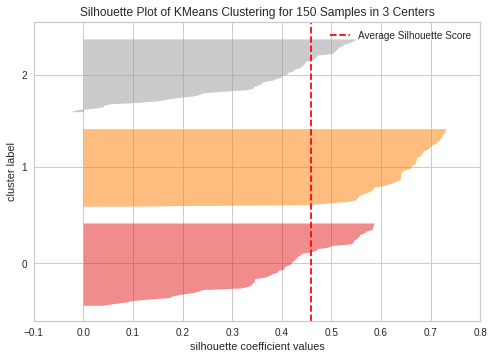

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


Se puede observar que con 3 cluster se obtiene un promedio de score de silueta de 0,47 y con 4 clusters un score de 0,39 aproximadamente, por lo tanto se recomienda entrenar un modelo de clustering con 3 clusters

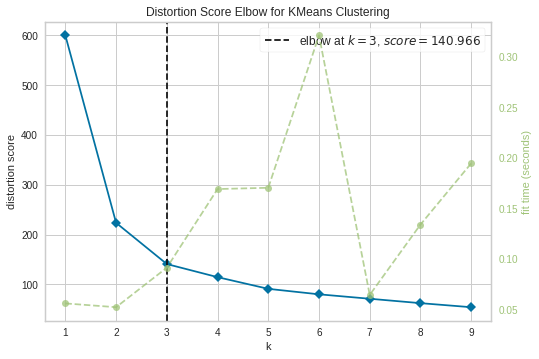

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
#from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

Observamos por el metodo de ELBOW que tenemos que utilizar un K=3 es decir 3 clusters.

### K-Means

Intente agrupar los datos en 4D y ver si puede reproducir los clústeres reales. Es decir, imagine que no tenemos las etiquetas de especies en estos datos y queremos dividir las flores en especies. podría establecer un número arbitrario de grupos 
e intentar dividirlos en grupos similares. Sabemos que hay 3 especies, así que encontremos 3 especies y veamos 
si las predicciones para cada punto coinciden con la etiqueta en y, por otro lado sabemos que por el metodo de las siluetas y elbow, la cantidad de clusters recomendada es 3

# Aplicación de K-Means

In [13]:
# apply K-Means to the scaled data with 3 clusters

nclusters = 3 
seed = 0

km = KMeans(n_clusters = nclusters,
            n_init = 13,
            init= "k-means++", 
            max_iter = 450,
            random_state = seed)

km.fit(X_scaled)


# predict the cluster for each data point

y_cluster_kmeans = km.predict(X_scaled)


print("\n Caracteristicas \n")
print(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_kmeans)


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]



 Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2

In [22]:
# change the label of the cluster to be able to see the accuracy

y_cluster_kmeans[y_cluster_kmeans == 1] = 3
y_cluster_kmeans[y_cluster_kmeans == 0] = 1
y_cluster_kmeans[y_cluster_kmeans == 3] = 0

# replace the labels to numbers

y_values = y.replace(["Iris-setosa", "Iris-versicolor", "Iris-virginica"], [0,1,2])

# get the accuracy

from sklearn.metrics import accuracy_score

print(round(accuracy_score(y_values, y_cluster_kmeans),4))

0.8333


Como podemos comprobar, la precisión de clasificación del algoritmo respecto a los datos reales, es de un 83.3%, valor que procederemos a explicar más adelante.

### Principal Component Analysis (PCA)


Si tiene muchas característics, puede ser útil reducir algunas características, para evitar la maldición de la dimensionalidad (es decir, necesitar exponencialmente más datos para hacer predicciones precisas a medida que crece la cantidad de características). 
Puede hacer esto con el análisis de componentes principales (PCA), que reasigna los datos a un nuevo sistema de coordenadas (más pequeño) que trata de dar cuenta de la mayor información posible. puedes *también* usar PCA para visualizar los datos al reducir las # características a 2 dimensiones y hacer un diagrama de dispersión.

En este caso recomiendo usar PCA para poder visualizar los datos, ya entrenamos el modelo de K-means y tenemos los clusters identificados, ahora transformemos de 4D a 2D las caracteristicas. para solo visualizarlas en un grafico, y poder observar los CLUSTERS.

# Aplicación de PCA

In [24]:
# importamos el algoritmo

from sklearn.decomposition import PCA

# creamos el algoritmo y lo entrenamos

ndimensions = 2

pca_scaled = PCA(n_components = ndimensions)
X_pca_array = pca_scaled.fit_transform(X_scaled)

# creamos un DataFrame

X_pca = pd.DataFrame(X_pca_array, columns=['principal component 1','principal component 2']) 


print(X_pca.sample(10))
explained_variance = pca_scaled.explained_variance_ratio_
print("\n\n explained_variance")
print(explained_variance)
print("\n\n Total explained variance", round((explained_variance[0]+explained_variance[1]),5))

     principal component 1  principal component 2
117               2.437378               2.556757
38               -2.435952              -0.882169
17               -2.190179               0.514304
24               -2.228217               0.162186
71                0.472370              -0.416608
70                0.738256               0.402470
3                -2.304197              -0.575368
106               0.358374              -1.560095
135               2.800949               0.844748
72                1.227988              -0.940915


 explained_variance
[0.72770452 0.23030523]


 Total explained variance 0.95801


Tenemosnuevas coordenadas 2D para cada punto de datos. 
En este punto, si no tiene datos etiquetados, puede agregar los ID de clúster de k-means a esta tabla y hacer un 
diagrama de dispersión de colores. en realidad tenemos etiquetas para los puntos de datos, pero imaginemos que 
no las tenemos, y usemos las etiquetas pronosticadas para ver cómo se ven las predicciones. 



In [25]:
# create a DataFrame with the principal components, the target and the cluster

finalDf = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf.head()

finalDf['ClusterKmeans'] = y_cluster_kmeans
finalDf.sample(10)

,principal component 1,principal component 2,target,ClusterKmeans
60,-0.124697,-2.658063,Iris-versicolor,1
130,2.435497,0.246654,Iris-virginica,2
129,1.864778,0.555382,Iris-virginica,2
74,0.700473,-0.063494,Iris-versicolor,1
133,1.111272,-0.295986,Iris-virginica,1
66,0.348006,-0.190622,Iris-versicolor,1
72,1.227988,-0.940915,Iris-versicolor,1
61,0.438730,-0.058881,Iris-versicolor,1
110,1.365909,0.693948,Iris-virginica,2
0,-2.264542,0.505704,Iris-setosa,0


### Grafica de Dispersion (TARGET)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados a la etiqueta o target, ya que partimos de un dataset etiquetado.

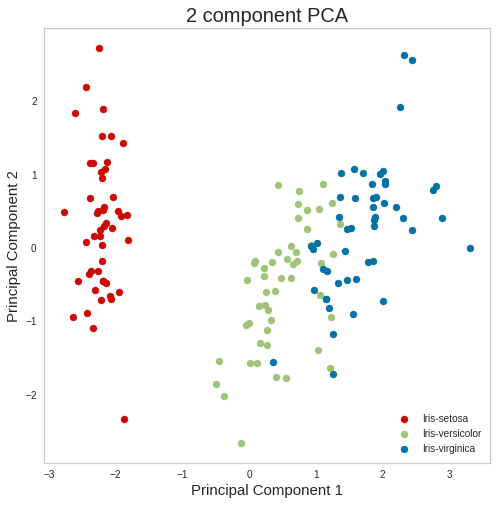

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Grafica de Dispersion (CLUSTERS)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados al CLUSTER obtenido luego de aplicar K-MEANS, como se puede comparar con los datos etiquetados, los clusters se ASEMEJAN BASTANTE.

Un mecanismo asi puede ser utilizado para etiquetar flores, cuando no tenemos la etiqueta de antemano, incluso nos puede servir para generar clasificaciones mas especificas.

Como aclaramos desde el principio, la division entre Versicolor y Virginica es muy fina, y en ambos graficos es costoso encontrar una division clara.

La division real, basada en los datos etiquetados de antemano, es por una linea VERTICAL al medio del conjunto de datos, en cambio segun K-means, la division es por una linea horizontal a traves de los datos.

En estos casos la realidad difiere un poco, de lo que establece un algoritmo matematico. Seguramente para obtener una mejor division sea necesario contar con mas caracteristicas.

Antes de pintar la gráfica, vamos a buscar la frontera de decisión entre los clústeres 1 y 2, para así poder representarlo gráficamente.

In [161]:
# calcular los centroides

centroides = km.cluster_centers_

# pasarlos por pca

centroides_pca = pca_scaled.transform(centroides)

# buscar la recta que une ambos centroides

x1, y1 = centroides_pca[0]
x2, y2 = centroides_pca[2]

m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

# calculamos la distancia entre ambos centroides

import math

distancia = math.sqrt((x2 - x1)**2 + (y2- y1)**2)
distancia_media = distancia/2

# hallamos el punto medio

x_medio = (x2 + x1) / 2 
y_medio = (y2 + y1) / 2

# buscar la perpendicular de la recta

m_perp = (-1/m)
# b_perp = y1 - m_perp * x1

# establecemos el límite izquierdo y derecho

x_left = min(finalDf["principal component 1"].loc[finalDf["ClusterKmeans"] == 1]) - 0.05 
x_right = max(finalDf["principal component 1"].loc[finalDf["ClusterKmeans"] == 2]) - 0.05


# creamos los puntos a representar

x_values = np.linspace(x_left, x_right, 50)
y_values = m_perp*(x_values-x_medio) + y_medio


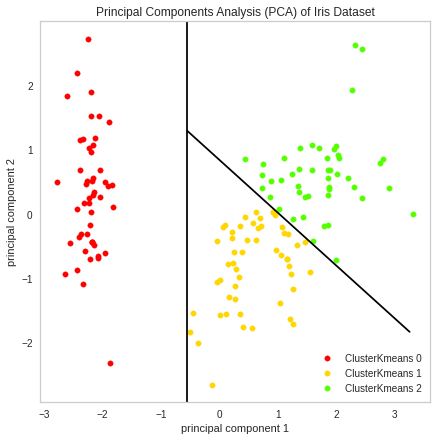

In [162]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.

    fig, ax = plt.subplots(figsize = (7,7))

    # color map

    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    
    ax.axvline(min(finalDf["principal component 1"].loc[finalDf["ClusterKmeans"] == 1]) - 0.05 , color='black')
    
    plt.plot(x_values, y_values, color = "black")
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(finalDf, 'ClusterKmeans')
    

# Fase adicional: Aplicación de otros algoritmos

En esta parte, vamos a usar otros algoritmos para serpar nuestros clusters y así comparar los resultados obtenidos.

## Aplicación de DBSCAN

Además del uso de K-Means, vamos a usar otro tipo de algoritmo de cluster para ver como se comporta. 

Usando como referencia esta imagen:
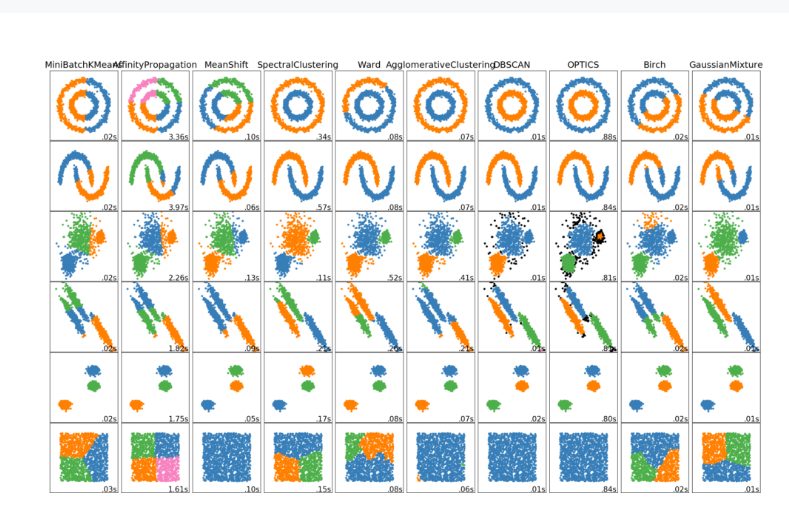

Podemos ver como DBSCAN parece adaptarse bien a la distribución de datos antes la cual nos encontramos.

Fuente: https://www.iartificial.net/clustering-agrupamiento-kmeans-ejemplos-en-python/


In [185]:
# importamos la libreria

from sklearn.cluster import DBSCAN

# creamos el algoritmo

dbs = DBSCAN(eps = 0.5,
              min_samples = 5)

# ajustamos el modelo y obtenemos las predicciones

dbs.fit(X_scaled)
dbs_pred = dbs.labels_



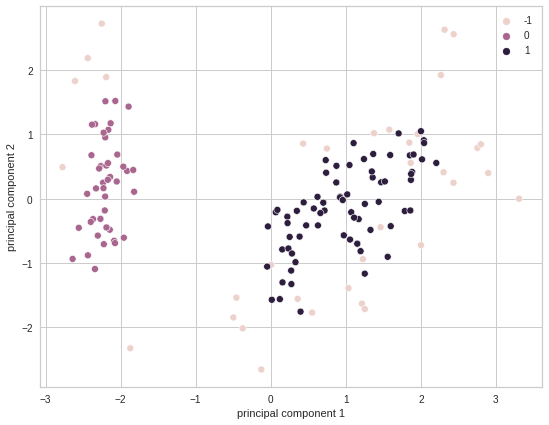

In [190]:
# graficamos el resultado

plt.figure(figsize = (9,7))
sns.scatterplot(x = finalDf["principal component 1"],
              y = finalDf["principal component 2"], 
              hue = dbs_pred)

plt.show()

## Aplicación de Gaussian Mixture

Como los resultados obtenidos no son del todo buenos, vamos a realizar otra prueba usando Gaussian Mixture.

In [187]:
# importamos la librería

from sklearn.mixture import GaussianMixture

# creamos nuestro modelo y lo entrenamos

GM = GaussianMixture(n_components = 3)

GM.fit(X_scaled)

# realizamos las prediciones

gm_pred = GM.predict(X_scaled)

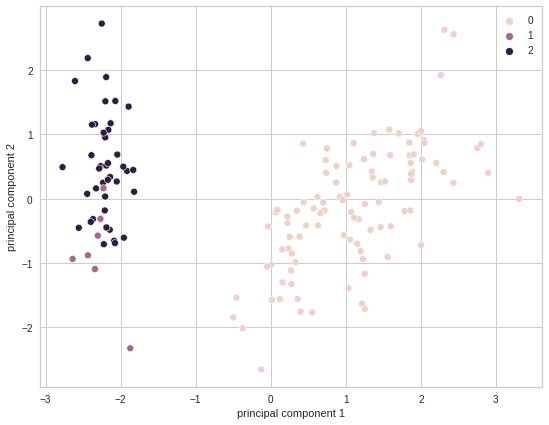

In [189]:
# graficamos el resultado

plt.figure(figsize = (9,7))
sns.scatterplot(x = finalDf["principal component 1"],
              y = finalDf["principal component 2"], 
              hue = gm_pred)

plt.show()

# Conclusiones

Durante este notebook hemos ido siguiendo los pasos necesarios para la correcta implementación de un algoritmo de clustering:

- En primer lugar, hemos visto con que tipo de datos estamos trabajando, número de variables, escala que toman las mismas, etc.

- Acto seguido hemos escalado las variables, ya que este tipo de algoritmos son muy sensibles a las distancias y aplicando un scaler conseguimos que todas las variables tengan media cero y varianza uno.

- Luego, gracias a los métodos de la silueta y del codo, hemos sido capaces de determinar cual es el número idóneo de clusters que debería de tener nuestro modelo.

- Para facilitar la representación gráfica de los datos, se ha usado la técnica del PCA, reduciendo las variables de 4 a 2, las cúales explican la varianza en casi un 96%. Luego de tener dos variables, se han representado gráficamente, diferenciando entre cada clase.

- Después de haber de haberlo preparado todo, se han aplicado diferentes algoritmos de clustering, representando los resultados en un espacio bidimensional para poder compararlos.


Al poder trabajar con datos previamente etiquetados, tenemos una referencia a la que podemos acudir. Normalmente en el mundo real, no disponemos de estas etiquetas, con lo que dificulta un poco el estudio y la comparación de los resultados. He ahí donde entran en juego, todas las técnicas aplicadas anteriormente.

Los resultados obtenidos usando DBSCAN y GaussianMixture no han sido del todo buenos, no habiendo dejado bien separados los grupos (es posible que se consiga una mejor combinación de hiperparámetros que hagan que la clasificación sea mejor, pero este punto no lo vamos a tratar en este notebook).

Por otro lado, la aplicación de K-Means ha sido un éxito y la separación que ha hecho dicho modelo parece incluso mejor que la separación que tienen los datos etiquetados.

Esto quiere decir que hay veces en que puede que el ojo humano se "equivoque" y haga una clasificación errónea, o que los algoritmos encuentren de manera matemática diferentes y mejores maneras de clasificar y de separar grupos entre sí.

Como bien es sabido, cada caso tiene sus particularidades, pero nunca está de más tener una visión más profunda de las problemáticas, gracias a la ayuda de la inteligencia artificial, y en espcial en este caso, gracias a la aplicación de algoritmos de clustering.